<a href="https://colab.research.google.com/github/maleiss2/MAE421/blob/main/ModuleB(17_4_17_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **17.4 Lagrange Polynomial Interpolation**
A continuous polynomial of degree N minus 1 that traverses a given collection of N data points is known as a Lagrange interpolating polynomial. In order to get the Lagrange Interpolating Polynomial particular to the N data points, one must first find an ordered combination of N Lagrange Polynomials and multiply them by each y-coordinate. The specified set of data points and their limitations are perfectly fitted by this one-of-a-kind polynomial. For each x-coordinate in the data collection, the rate of change values might be included in the constraints, for instance.

We will calculate a Lagrange Interpolating Polynomial only after taking into account the exact set of data points for the sake of simplicity.


A Lagrange Interpolating Polynomial is shown as: for a given set of (x1, y1), (x2, y2),..., (xN, yN):

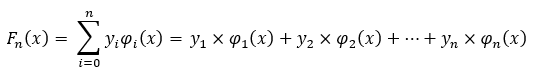

Where the yi‘s are the y-coordinates from the given data set (in respect to their paired x-coordinate) and where each φi (x) are individual Lagrange Polynomials formed by using the x-coordinates from the given N data points. The Lagrange Polynomial equation is:

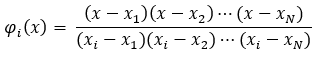

In [1]:
from typing import List, Tuple

def lagrange_interpolation(points: List[Tuple[float, float]]) -> str:
    n = len(points)
    x_values, y_values = list(zip(*points))
    result = "P(x) = "
    for i in range(n):
        term = str(y_values[i]) + " * "
        for j in range(n):
            if j != i:
                term += "(x - " + str(x_values[j]) + ") / (" + str(x_values[i]) + " - " + str(x_values[j]) + ") * "
        result += term[:-3]
        if i != n - 1:
            result += " + "
    return result

#You can use this function to find the Lagrange polynomial that passes through a set of points by calling it with a list of tuples, each containing the x and y coordinates of a point. The function will return a string representation of the polynomial.

#For example:
points = [(0, 1), (1, 3), (2, 5)]
print(lagrange_interpolation(points))

#This polynomial can be used to interpolate the points you passed in.

P(x) = 1 * (x - 1) / (0 - 1) * (x - 2) / (0 - 2) + 3 * (x - 0) / (1 - 0) * (x - 2) / (1 - 2) + 5 * (x - 0) / (2 - 0) * (x - 1) / (2 - 1)


# **17.5 Newton’s Polynomial Interpolation**
Newton's Polynomial Interpolation is a method for constructing a polynomial that passes through a given set of data points. It is based on the idea of using the differences between the function values at consecutive points to approximate the function with a polynomial. The resulting polynomial is called the Newton form or the Newton interpolation polynomial. It is computed using the divided differences method, which is an efficient way to compute the coefficients of the polynomial. The Newton interpolation polynomial has some good properties, such as being easy to evaluate and having a unique representation, but it also has some drawbacks, such as being sensitive to the order of the data points.

In [2]:
import sys
import traceback
class NewtonPolynomialInterpolation:
    X = [0.0, 2.0, 3.0, 5.0, 8.0]
    Y = [0.8, 3.2, 2.8, 4.5, 1.9]

    def __init__(self):
        self.n = len(self.X)

    def compute(self):
        try:
            print("      x      y")
            for a in range(int(self.X[-1]) * 2 + 1):
                t = 0.5 * a
                print("{:7.2f}{:7.2f}".format(t, self.__interpolate(t)))
        except Exception as e:
            raise

    def __interpolate(self, t):
        try:
            c = [0 for _ in range(self.n)]
            w = [0 for _ in range(self.n)]
            for i in range(0, self.n):
                w[i] = self.Y[i]
                for j in reversed(range(i)):
                    w[j] = (w[j + 1] - w[j]) / (self.X[i] - self.X[j])
                c[i] = w[0]
            s = c[self.n - 1]
            for i in reversed(range(self.n - 1)):
                s = s * (t - self.X[i]) + c[i]
            return s
        except Exception as e:
            raise
if __name__ == '__main__':
    try:
        obj = NewtonPolynomialInterpolation()
        obj.compute()
    except Exception as e:
        traceback.print_exc()
        sys.exit(1)

      x      y
   0.00   0.80
   0.50   2.49
   1.00   3.23
   1.50   3.37
   2.00   3.20
   2.50   2.95
   3.00   2.80
   3.50   2.85
   4.00   3.17
   4.50   3.74
   5.00   4.50
   5.50   5.32
   6.00   6.03
   6.50   6.37
   7.00   6.05
   7.50   4.70
   8.00   1.90
